# GARCH

This notebook contains the results of voltality forecasting with GARCH and a few of it's variants on S&P500 returns.
1. GARCH(1,1) <-- would be nice to also have a method of moments implementation
2. EGARCH(1,1)
3. GJR-GARCH(1,1,1)

In [43]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

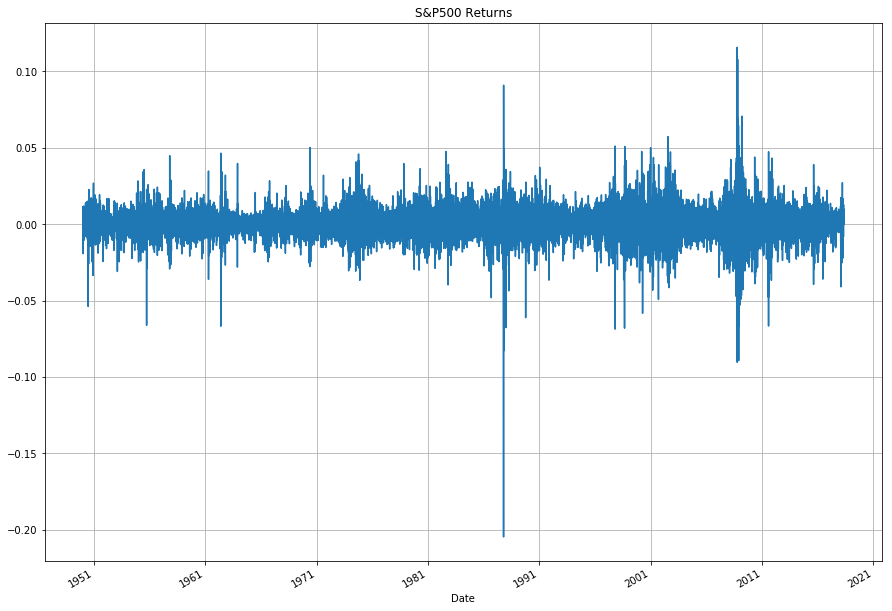

In [44]:
# Read in and adjust data
sp500returns = pd.read_csv("sp500returns.csv", index_col=0, names=['Date', 'Return'])
sp500returns = sp500returns['Return']
sp500returns.index = sp500returns.index.astype('datetime64[ns]')
sp500returns.plot(title='S&P500 Returns',grid=True, figsize=(15, 11));

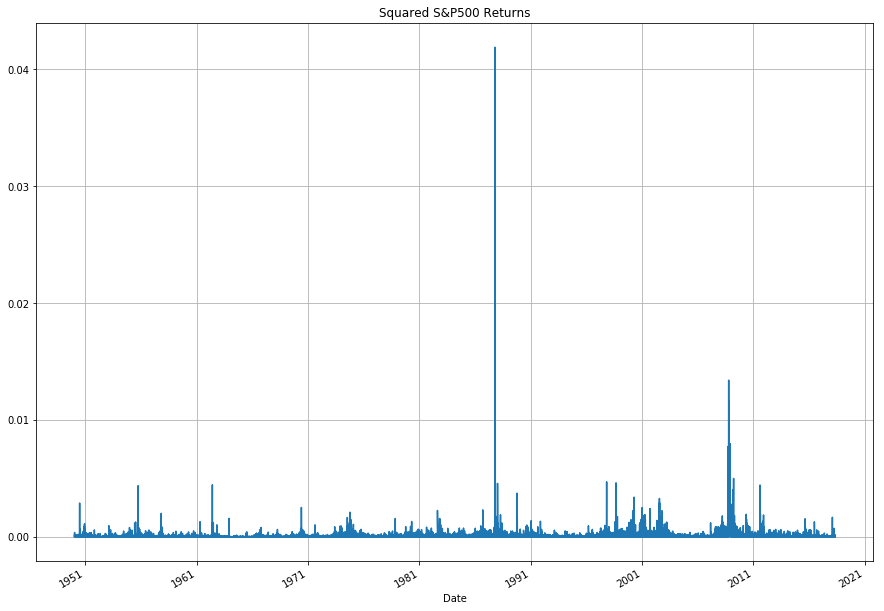

In [45]:
squaredreturns = sp500returns**2
squaredreturns.plot(title = "Squared S&P500 Returns", grid=True, figsize=(15,11))

In [46]:
squaredreturns_standardized = (squaredreturns - np.mean(squaredreturns))/(np.std(squaredreturns))

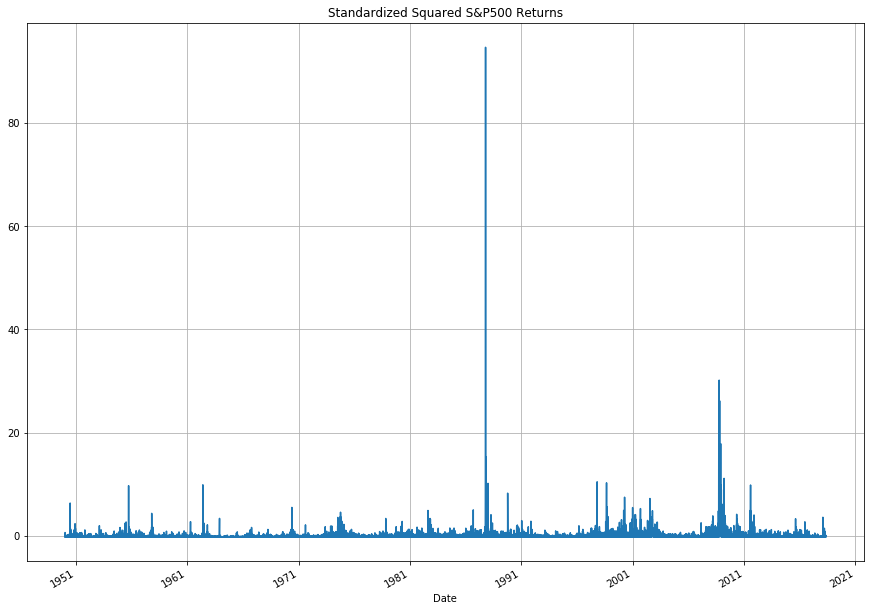

In [47]:
squaredreturns_standardized.plot(title = "Standardized Squared S&P500 Returns", grid=True, figsize=(15,11))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=61,center=False).std()
  


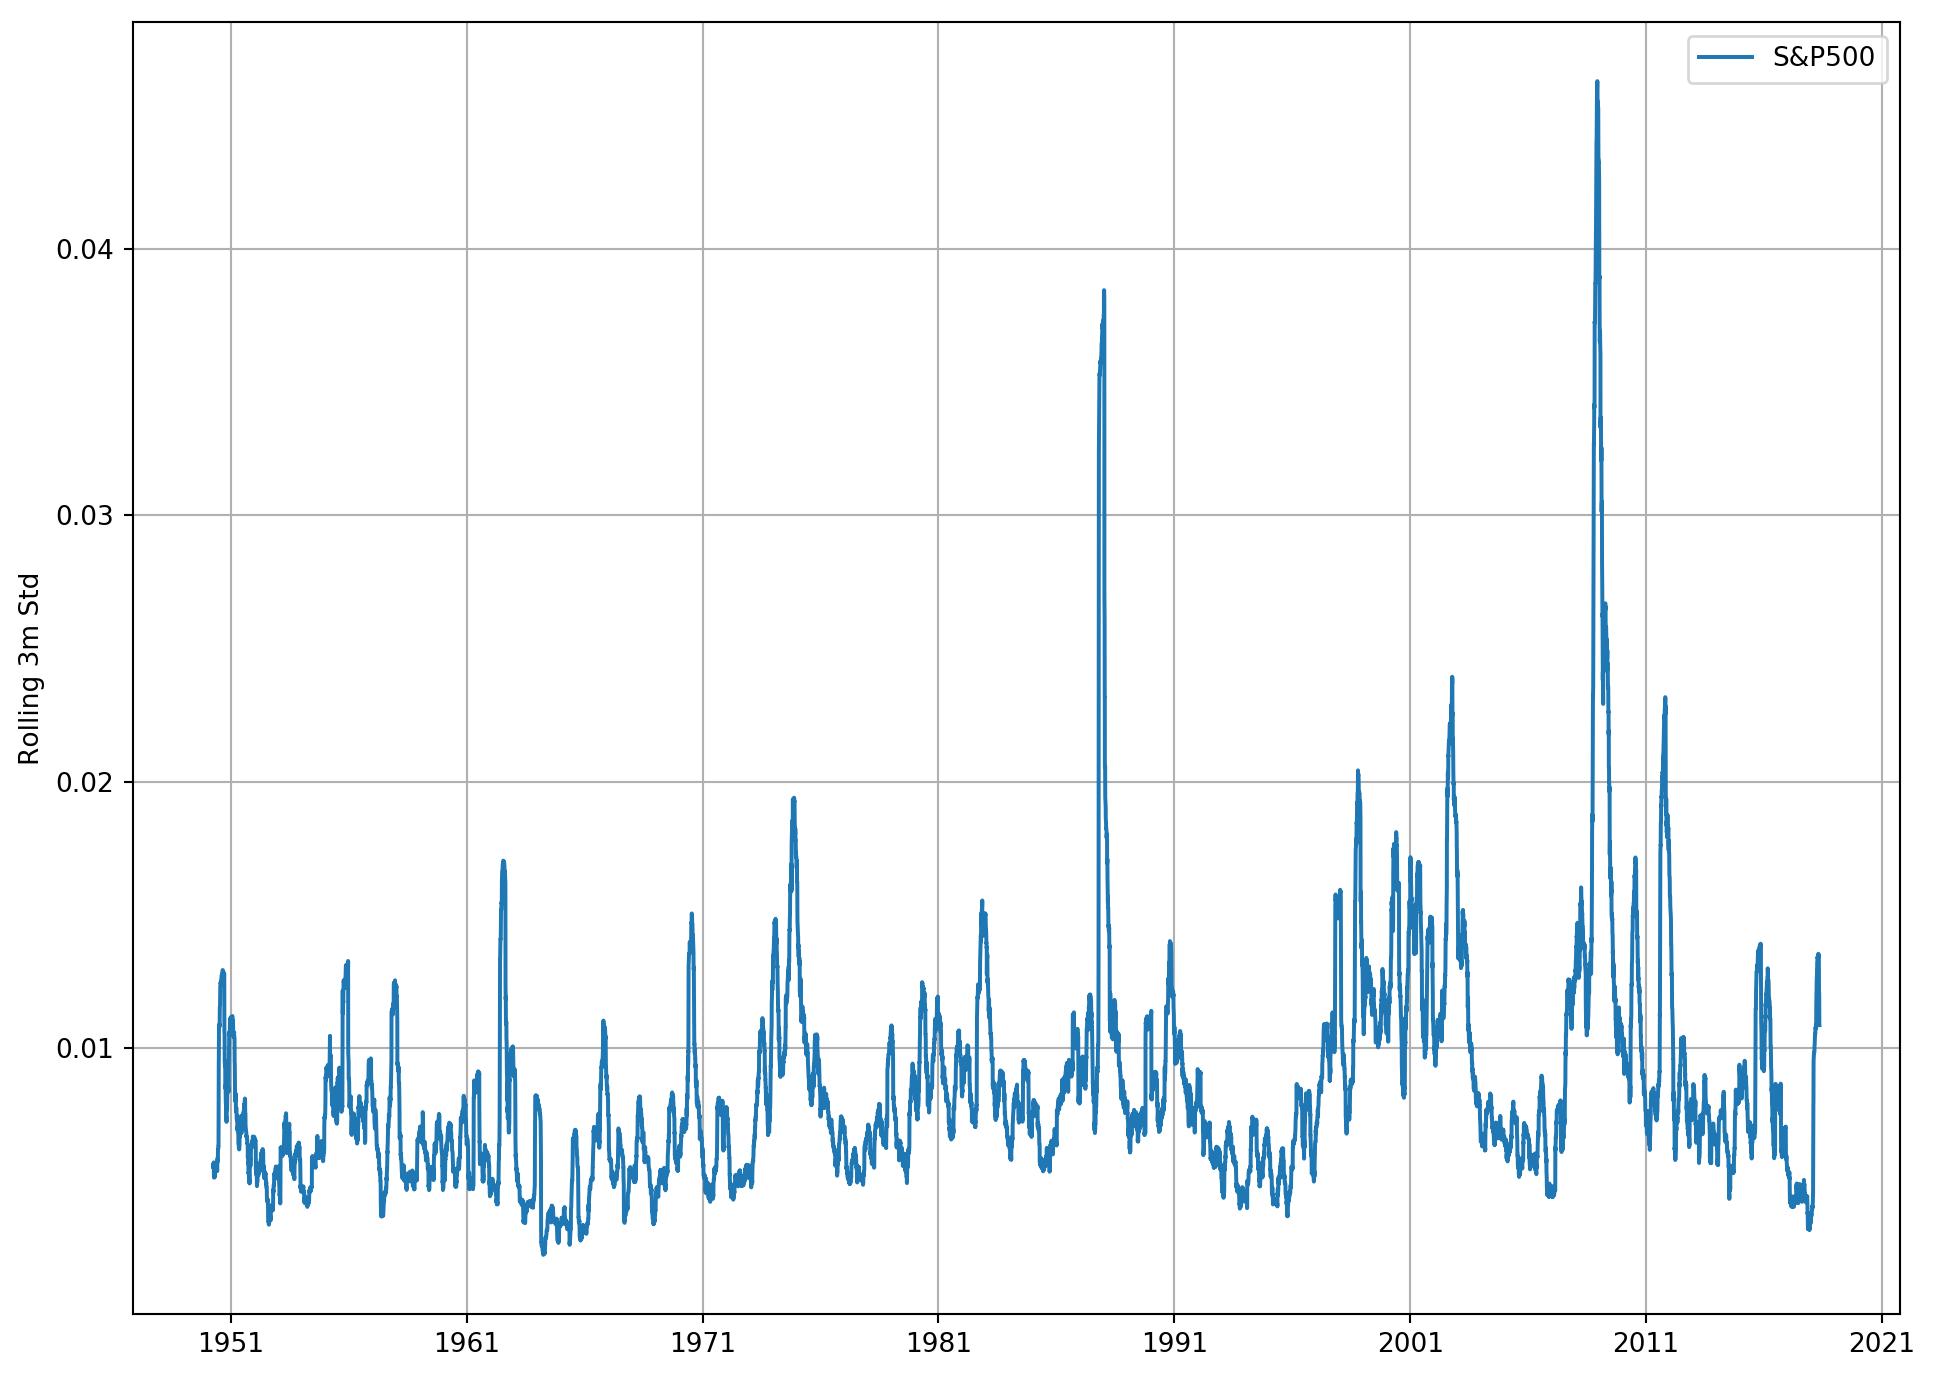

In [101]:
plt.figure(figsize=(12, 9), dpi=190)
plt.plot(pd.rolling_std(sp500returns, 61))
plt.grid(True)
plt.ylabel('Rolling 3m Std')
plt.legend(['S&P500']);

## One-step ahead forecast with GJR-GARCH(1,1,1)

In [88]:
gjr_garch111 = arch_model(sp500returns[:'1987-10-16'], vol='Garch', p=1, o=1, q=1, dist='StudentsT')
res = garch.fit(update_freq=10)
res.summary()

Iteration:     10,   Func. Count:    110,   Neg. LLF: 36022.37930124889
Iteration:     20,   Func. Count:    190,   Neg. LLF: 35961.61661470946
Iteration:     30,   Func. Count:    298,   Neg. LLF: 94866.05890163149
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 94806.09939710531
            Iterations: 36
            Function evaluations: 357
            Gradient evaluations: 36


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Constant Mean - GJR-GARCH Model Results                          
==========================================================================================
Dep. Variable:                       Return   R-squared:          -1166370738699949824.000
Mean Model:                   Constant Mean   Adj. R-squared:     -1166370738699949824.000
Vol Model:                        GJR-GARCH   Log-Likelihood:                     -94806.1
Distribution:      Standardized Student's t   AIC:                                 189624.
Method:                  Maximum Likelihood   BIC:                                 189658.
                                              No. Observations:                       1971
Date:                      Tue, May 22 2018   Df Residuals:                           1965
Time:                              23:17:58   Df Model:                                  6
                                   Mean Model                                  
===============================================================================
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
mu         -1.0003e+07    543.786 -1.840e+04      0.000 [-1.000e+07,-1.000e+07]
                               Volatility Model                               
==============================================================================
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
omega      8.5788e-04  9.606e-04      0.893      0.372  [-1.025e-03,2.741e-03]
alpha[1]       1.0000  7.058e-03    141.674      0.000       [  0.986,  1.014]
gamma[1]      -0.0294  2.311e-03    -12.725  4.276e-37 [-3.394e-02,-2.488e-02]
beta[1]        0.0147  8.896e-04     16.530  2.243e-61   [1.296e-02,1.645e-02]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             2.0698  2.343e-05  8.832e+04      0.000 [  2.070,  2.070]
========================================================================

Covariance estimator: robust
"""

Does the GJR-GARCH(1,1,1) 1-step ahead forecast (MSE) beat the benchmark sample variance estimator?

In [97]:
vol_3m = np.var(sp500returns['1987-7':'1987-10-16'])
vol_6m = np.var(sp500returns['1987-4':'1987-10-16'])
vol_12m = np.var(sp500returns['1986-10':'1987-10-16'])
model_forecast = res.forecast()

In [98]:
model_forecast.mean.iloc[-1]**2

h.1    1.000610e+14
Name: 1987-10-16 00:00:00, dtype: float64

In [99]:
print(vol_3m)
print(vol_6m)
print(vol_12m)

0.00014175502370388816
0.00013369034337356182
0.00010663251552764189


In [2]:
1.000610e+14/0.00014175502370388816

7.058726906851447e+17